# Confidence interval for Pearson's correlation

With a given correlation $\rho$, the transformed $z$ following is approximately normally distributed with variance of $\frac{1}{n-3}$ where $n$ is the sample size.

$$
z = \frac{1}{2} {\rm ln}\left( \frac{1 + \rho}{1 - \rho} \right)
$$

This is just an `arctanh` function to map from (-1, 1) to (-inf, inf), or if you fancy so-called Fisher transformation (https://en.wikipedia.org/wiki/Fisher_transformation).

In [1]:
%matplotlib inline

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
def to_z(corr):
    """ Convert a Pearson correlation to $z$ which is approximately normally distributed """
    return 0.5 * np.log((1 + corr) / (1 - corr))

$z$ goes to `inf` when $\rho$ is 1 or -1.

In [3]:
corr = np.linspace(-1, 1, 1000)
z = to_z(corr)

<ipython-input-2-b383a178c785>:3: RuntimeWarning: divide by zero encountered in true_divide
  return 0.5 * np.log((1 + corr) / (1 - corr))
<ipython-input-2-b383a178c785>:3: RuntimeWarning: divide by zero encountered in log
  return 0.5 * np.log((1 + corr) / (1 - corr))


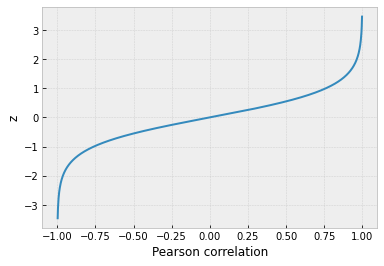

In [4]:
fig, ax = plt.subplots()
ax.plot(corr, z)
ax.set_xlabel('Pearson correlation')
ax.set_ylabel('z');

# Two-sided confidence interval

In [5]:
def corr_ci(corr, alpha: float, n: int):
    """ Compute the two-sided confidence interva for a Pearson correlation """
    sigma = norm.ppf(alpha + (1 - alpha) / 2, 0, 1)
    z = to_z(corr)
    var = 1.0 / (n - 3)
    
    z_lower = z - sigma * var ** 0.5
    z_upper = z + sigma * var ** 0.5
    
    corr_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
    corr_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)
    
    return corr_lower, corr_upper

Symmetric when the base correlation is 0

In [6]:
corr_ci(0, alpha=0.95, n=100)

(-0.19641811768205933, 0.19641811768205936)

Otherwise it's asymmetric. 

In [7]:
corr_ci(0.5, alpha=0.95, n=100)

(0.3366433044090918, 0.6341398407485443)

In [8]:
corr_lower, corr_upper = corr_ci(corr, alpha=0.95, n=100)

<ipython-input-2-b383a178c785>:3: RuntimeWarning: divide by zero encountered in true_divide
  return 0.5 * np.log((1 + corr) / (1 - corr))
<ipython-input-2-b383a178c785>:3: RuntimeWarning: divide by zero encountered in log
  return 0.5 * np.log((1 + corr) / (1 - corr))
<ipython-input-5-38ed633e41fe>:10: RuntimeWarning: invalid value encountered in true_divide
  corr_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
<ipython-input-5-38ed633e41fe>:11: RuntimeWarning: invalid value encountered in true_divide
  corr_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)


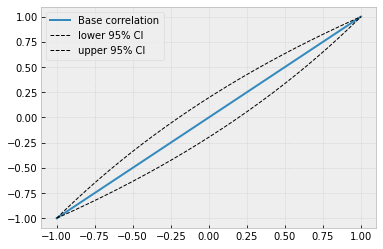

In [9]:
fig, ax = plt.subplots()
ax.plot(corr, corr, label='Base correlation')
ax.plot(corr, corr_lower, label='lower 95% CI', color='black', lw=1, ls='--')
ax.plot(corr, corr_upper, label='upper 95% CI', color='black', lw=1, ls='--')
ax.legend();

In [10]:
corr_lower2, corr_upper2 = corr_ci(corr, alpha=0.95, n=1000)

<ipython-input-2-b383a178c785>:3: RuntimeWarning: divide by zero encountered in true_divide
  return 0.5 * np.log((1 + corr) / (1 - corr))
<ipython-input-2-b383a178c785>:3: RuntimeWarning: divide by zero encountered in log
  return 0.5 * np.log((1 + corr) / (1 - corr))
<ipython-input-5-38ed633e41fe>:10: RuntimeWarning: invalid value encountered in true_divide
  corr_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
<ipython-input-5-38ed633e41fe>:11: RuntimeWarning: invalid value encountered in true_divide
  corr_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)


The band becomes narrower as the sample size increases.

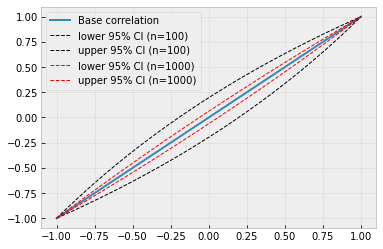

In [11]:
fig, ax = plt.subplots()
ax.plot(corr, corr, label='Base correlation')
ax.plot(corr, corr_lower, label='lower 95% CI (n=100)', color='black', lw=1, ls='--')
ax.plot(corr, corr_upper, label='upper 95% CI (n=100)', color='black', lw=1, ls='--')
ax.plot(corr, corr_lower2, label='lower 95% CI (n=1000)', color='red', lw=1, ls='--')
ax.plot(corr, corr_upper2, label='upper 95% CI (n=1000)', color='red', lw=1, ls='--')
ax.legend();

# Reference
- Confidence Intervals for Pearson’s Correlation https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/PASS/Confidence_Intervals_for_Pearsons_Correlation.pdf